Troop Girls Data:
   Troop  GirlsSelling
0    524            18
1    536            10
2    872             2
3   2019             7
4   2554             6

Booth Signup Data:
   Troop  BoothCount
0   3396         271
1    203         155
2   3829          85
3    558          84
4   2121          73

Merged Data:
   Troop  BoothCount  GirlsSelling
0   3396         271           NaN
1    203         155           NaN
2   3829          85           7.0
3    558          84           NaN
4   2121          73           NaN

Merged Data with SignupPerGirl:
   Troop  BoothCount  GirlsSelling  SignupPerGirl
0   3396         271           NaN            NaN
1    203         155           NaN            NaN
2   3829          85           7.0      12.142857
3    558          84           NaN            NaN
4   2121          73           NaN            NaN

Average Signup Per Girl: 3.68


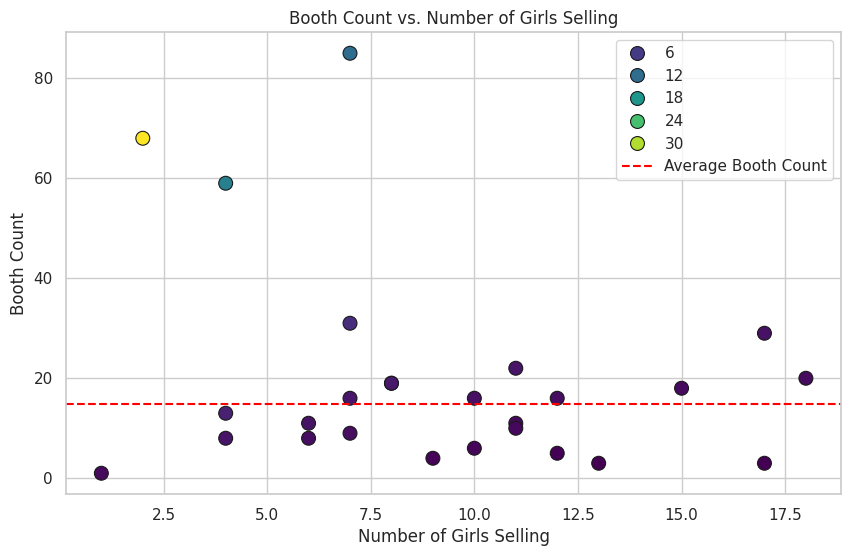

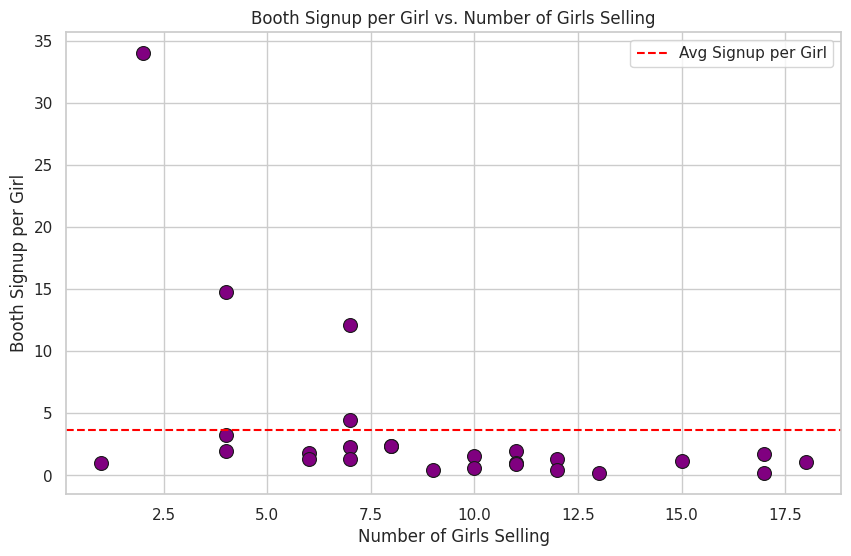


Statistical Summary of SignupPerGirl:
count    26.000000
mean      3.684127
std       7.051683
min       0.176471
25%       1.000000
50%       1.466667
75%       2.352679
max      34.000000
Name: SignupPerGirl, dtype: float64

Potential Outlier Troops (|Z| > 2):
   Troop  GirlsSelling  BoothCount  SignupPerGirl  SignupPerGirl_Z
5    872           2.0          68           34.0         4.384237


In [10]:
# %% [markdown]
# # Analysis of Booth Signups Adjusted by Troop Size
#
# In this notebook, we combine the booth signup data with troop data that includes the number of girls selling (from each troop). This lets us compute normalized metrics such as the booth signups per girl and then explore the impact of outlier troops.

# %%
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

# For inline plotting in Jupyter Notebook
%matplotlib inline

# %%
# Load the troop girls data
# Assuming the CSV file 'troop_girls.csv' contains columns: "Troop#" and "GirlsSelling"
troop_girls_df = pd.read_csv('data/2025_troop_size_unit.csv')

# Display the first few rows
print("Troop Girls Data:")
print(troop_girls_df.head())

# %%
# Load the booth signup data
# Assuming the CSV file 'booth_signups.csv' contains a column "Troop" among other data
booth_signups_df = pd.read_csv('data/2025_booth_counts.csv')

# Display the first few rows
print("\nBooth Signup Data:")
print(booth_signups_df.head())

# %%
# Merge the two datasets on Troop
merged_df = pd.merge(booth_signups_df, troop_girls_df, on='Troop', how='left')

# Verify the merge by checking the first few rows
print("\nMerged Data:")
print(merged_df.head())

# %%
# Create a new column for the booth signup rate per girl.
# We handle troops with zero girls selling by setting the value to NaN.
merged_df['SignupPerGirl'] = merged_df.apply(
    lambda row: row['BoothCount'] / row['GirlsSelling'] if row['GirlsSelling'] > 0 else np.nan,
    axis=1
)

# Display the updated dataframe with the new column
print("\nMerged Data with SignupPerGirl:")
print(merged_df[['Troop', 'BoothCount', 'GirlsSelling', 'SignupPerGirl']].head())

# %%
# ### Outlier Analysis
# Let’s plot the booth count against the number of girls selling.
# We also add a reference line for the average signup per girl.

# Calculate average signup per girl (ignoring NaN values)
avg_signup_per_girl = merged_df['SignupPerGirl'].mean()
print(f"\nAverage Signup Per Girl: {avg_signup_per_girl:.2f}")

# %%
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='GirlsSelling', y='BoothCount', hue='SignupPerGirl', palette='viridis', s=100, edgecolor='k')
plt.axhline(merged_df['BoothCount'].mean(), color='red', linestyle='--', label='Average Booth Count')
plt.xlabel('Number of Girls Selling')
plt.ylabel('Booth Count')
plt.title('Booth Count vs. Number of Girls Selling')
plt.legend()
plt.show()

# %%
# Optionally, you can create a scatter plot of SignupPerGirl against GirlsSelling.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='GirlsSelling', y='SignupPerGirl', s=100, color='purple', edgecolor='k')
plt.axhline(avg_signup_per_girl, color='red', linestyle='--', label='Avg Signup per Girl')
plt.xlabel('Number of Girls Selling')
plt.ylabel('Booth Signup per Girl')
plt.title('Booth Signup per Girl vs. Number of Girls Selling')
plt.legend()
plt.show()

# %%
# ### Statistical Summary
# Get a summary of the SignupPerGirl metric to assess variability and potential outliers.

summary_stats = merged_df['SignupPerGirl'].describe()
print("\nStatistical Summary of SignupPerGirl:")
print(summary_stats)


# Create an empty column filled with NaN
merged_df['SignupPerGirl_Z'] = np.nan

# Identify rows where SignupPerGirl is not NaN
non_na_mask = merged_df['SignupPerGirl'].notna()

# Compute z-scores only on the non-NaN values and assign back to those rows
merged_df.loc[non_na_mask, 'SignupPerGirl_Z'] = zscore(merged_df.loc[non_na_mask, 'SignupPerGirl'])

# Now, you can identify potential outliers using the computed z-scores.
outliers = merged_df[(merged_df['SignupPerGirl_Z'].abs() > 2)]
print("\nPotential Outlier Troops (|Z| > 2):")
print(outliers[['Troop', 'GirlsSelling', 'BoothCount', 'SignupPerGirl', 'SignupPerGirl_Z']])

# %%
# End of Notebook
